<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://www.dropbox.com/s/220ncn0o5danuey/pandas-ipython-tutorials-hedaro.jpg?dl=1" title="Pandas Tutorial | Hedaro" alt="Pandas Tutorial | Hedaro">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
        <h1>Lesson 2</h1>
        <br>
        <br>
        <strong>These tutorials are also available through an email course, please visit </strong><a href="http://www.hedaro.com/pandas-tutorial" target="_blank"><strong>http://www.hedaro.com/pandas-tutorial</strong></a> <strong>to sign up today.</strong>
	  </center>	
    <!-- Pandas Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

**Create Data** - We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.  
**Get Data** - We will learn how to read in the text file containing the baby names. The data consist of baby names born in the year 1880.  
**Prepare Data** - Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.  
**Analyze Data** - We will simply find the most popular name in a specific year.  
**Present Data** - Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.  

***NOTE:  
Make sure you have looked through all previous lessons as the knowledge learned in previous lessons will be needed for this exercise.***  
    

> ***Numpy*** will be used to help generate the sample data set. Importing the libraries is the first step we will take in the lesson.

In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Pandas version 1.0.5
Matplotlib version 3.2.2


# Create Data  

The data set will consist of 1,000 baby names and the number of births recorded for that year (1880). We will also add plenty of duplicates so you will see the same baby name more than once. You can think of the multiple entries per name simply being different hospitals around the country reporting the number of births per baby name. So if two hospitals reported the baby name "Bob", the data will have two values for the name Bob. We will start by creating the random set of baby names. 

In [3]:
# The inital set of baby names
names = ['Bob','Jessica','Mary','John','Mel']

To make a random list of 1,000 baby names using the five above we will do the following:  

* Generate a random number between 0 and 4  

To do this we will be using the functions ***seed***, ***randint***, ***len***, ***range***, and ***zip***.   

In [4]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.

random.seed?

Docstring:
seed(seed=None)

Seed the generator.

This method is called when `RandomState` is initialized. It can be
called again to re-seed the generator. For details, see `RandomState`.

Parameters
----------
seed : int or 1-d array_like, optional
    Seed for `RandomState`.
    Must be convertible to 32 bit unsigned integers.

See Also
--------
RandomState
Type:      builtin_function_or_method


In [5]:
random.randint?

Docstring:
randint(low, high=None, size=None, dtype='l')

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

Parameters
----------
low : int
    Lowest (signed) integer to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
dtype : dtype, optional
    Desired dtype of the result. All dtypes are determined by their
    name, i.e., 'in

In [6]:
len?

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method


In [7]:
range?

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     


**seed(500)** - Create seed

**randint(low=0,high=len(names))** - Generate a random integer between zero and the length of the list "names".    

**names[n]** - Select the name where its index is equal to n.  

**for i in range(n)** - Loop until i is equal to n, i.e. 1,2,3,....n.  

**random_names** = Select a random name from the name list and do this n times.  

In [8]:
names

['Bob', 'Jessica', 'Mary', 'John', 'Mel']

In [9]:
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# Print first 10 records
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

Generate a random numbers between 0 and 1000    

In [10]:
# The number of births per name for the year 1880
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

Merge the ***names*** and the ***births*** data set using the ***zip*** function.

In [11]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

We are basically done creating the data set. We now will use the ***pandas*** library to export this data set into a csv file. 

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [12]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


* Export the dataframe to a ***text*** file. We can name the file ***births1880.txt***. The function ***to_csv*** will be used to export. The file will be saved in the same location of the notebook unless specified otherwise.

The only parameters we will use is ***index*** and ***header***. Setting these parameters to False will prevent the index and header names from being exported. Change the values of these parameters to get a better understanding of their use.

In [13]:
df.to_csv('births1880.txt',index=False,header=False)

## Get Data

To pull in the text file, we will use the pandas function *read_csv*. Let us take a look at this function and what inputs it takes.

Even though this functions has many parameters, we will simply pass it the location of the text file.  

Location = C:\Users\TYPE_USER_NAME\.xy\startups\births1880.txt  

***Note:*** Depending on where you save your notebooks, you may need to modify the location above. 

In [14]:
# Location = r'C:\Users\david\notebooks\update\births1880.txt'
Location = 'births1880.txt'
df = pd.read_csv(Location)

Notice the ***r*** before the string. Since the slashes are special characters, prefixing the string with a ***r*** will escape the whole string.  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mary    999 non-null    object
 1   968     999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


Info says:  

* There are ***999*** records in the data set  
* There is a column named ***Mary*** with 999 values  
* There is a column named ***968*** with 999 values  
* Out of the ***two*** columns, one is ***numeric***, the other is ***non numeric***  

To actually see the contents of the dataframe we can use the ***head()*** function which by default will return the first five records. You can also pass in a number n to return the top n records of the dataframe. 

In [16]:
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


This brings us to our first problem of the exercise. The ***read_csv*** function treated the first record in the text file as the header names. This is obviously not correct since the text file did not provide us with header names.  

To correct this we will pass the ***header*** parameter to the *read_csv* function and set it to ***None*** (means null in python).

In [17]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Info now says:  
* There are ***1000*** records in the data set  
* There is a column named ***0*** with 1000 values  
* There is a column named ***1*** with 1000 values  
* Out of the ***two*** columns, one is ***numeric***, the other is ***non numeric***  

Now lets take a look at the last five records of the dataframe

In [18]:
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


If we wanted to give the columns specific names, we would have to pass another paramter called ***names***. We can also omit the *header* parameter.

In [19]:
df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


You can think of the numbers [0,1,2,3,4,...] as the row numbers in an Excel file. In pandas these are part of the ***index*** of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.  

***[Names, Births]*** can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.

Delete the txt file now that we are done using it.

In [20]:
import os
os.remove(Location)

## Prepare Data

The data we have consists of baby names and the number of births in the year 1880. We already know that we have 1,000 records and none of the records are missing (non-null values). We can verify the "Names" column still only has five unique names.  

We can use the ***unique*** property of the dataframe to find all the unique records of the "Names" column.

In [21]:
# Method 1:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [22]:
# If you actually want to print the unique values:
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [23]:
# Method 2:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [24]:
df.describe()

,Births
count,1000.000000
mean,497.105000
std,285.350207
min,1.000000
25%,253.500000
50%,494.000000
75%,729.000000
max,998.000000


Since we have multiple values per baby name, we need to aggregate this data so we only have a baby name appear once. This means the 1,000 rows will need to become 5. We can accomplish this by using the ***groupby*** function. 

In [25]:
df.groupby?

Signature:
df.groupby(
    by=None,
    axis=0,
    level=None,
    as_index: bool = True,
    sort: bool = True,
    group_keys: bool = True,
    squeeze: bool = False,
    observed: bool = False,
) -> 'groupby_generic.DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is determine the groups. A label or list of
    labels may be 

In [26]:
# Create a groupby object
name = df.groupby('Names')

# Apply the sum function to the groupby object
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


## Analyze Data

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.  

* Sort the dataframe and select the top row
* Use the ***max()*** attribute to find the maximum value

In [27]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Bob,106817


In [28]:
# Method 2:
df['Births'].max()

106817

## Present Data

Here we can plot the ***Births*** column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that **Bob** is the most popular baby name in the data set. 

The most popular name


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


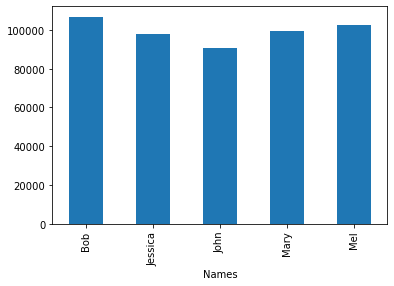

In [29]:
# Create graph
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>